# Image Basic
* name : Jikhan Jeong
* reference: http://doc.mindscale.kr/km/unstructured/07.html (Korean)
* picture : https://www.instagram.com/sh_9513/?hl=ko (Popular Korean actress and singer, Seolhyun Kim
* short cut : h key showing short-cut command in Jupyter

In [1]:
from PIL import Image
import numpy as np
import os

In [2]:
pwd

'C:\\Users\\정직한\\2019_Deep_Learning'

In [3]:
image_path ='sul1.jpg'

In [4]:
image = Image.open(image_path)

In [5]:
image.size

(446, 573)

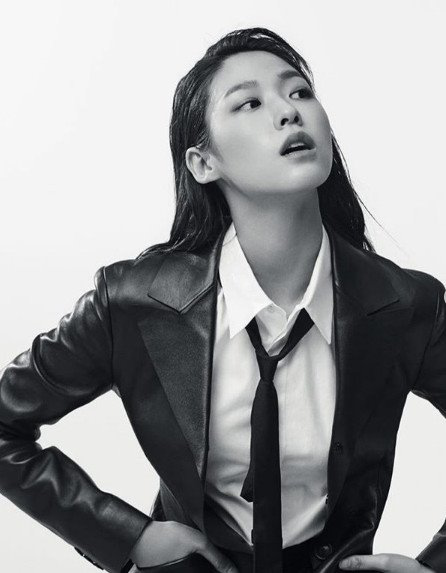

In [6]:
image

In [7]:
small_image = image.resize((225,225))

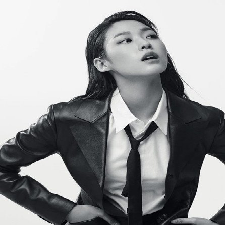

In [8]:
small_image

In [9]:
small_image.save('small_image.jpg')

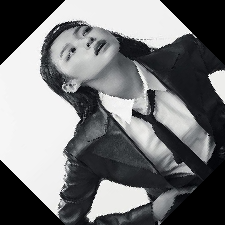

In [10]:
small_image.rotate(45)

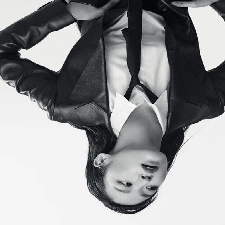

In [11]:
small_image.transpose(Image.FLIP_TOP_BOTTOM)

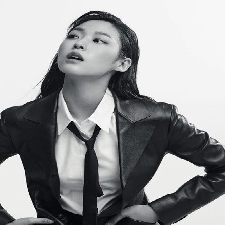

In [12]:
small_image.transpose(Image.FLIP_LEFT_RIGHT)

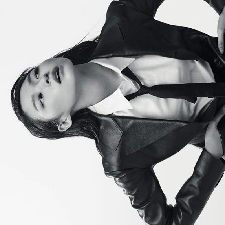

In [13]:
small_image.transpose(Image.ROTATE_90)

# Convert
.convert(): change colors  
* L: black  
* RGB: Red, Green, Blue  
* RGBA: Red, Green, Blue, Transparnt  
* CMYK: Cyan, Magenta, Yellow, Black  

In [14]:
image2 = 'sul2.png'

In [24]:
color_image = Image.open(image2)

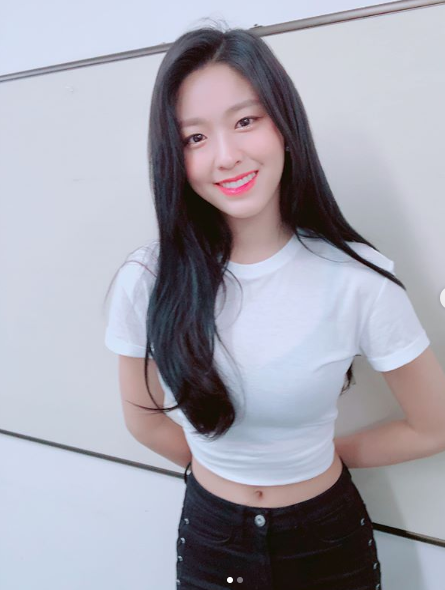

In [25]:
color_image

In [26]:
color_image.size

(445, 590)

In [27]:
color_image_2 = color_image.resize((445,445))

In [28]:
color_image_2.size

(445, 445)

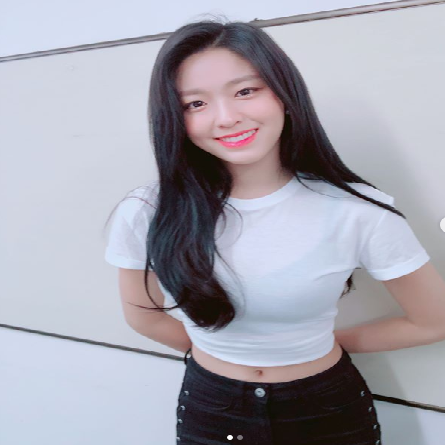

In [29]:
color_image_2

In [31]:
black_image = color_image_2.convert('L')

In [33]:
black_image.size

(445, 445)

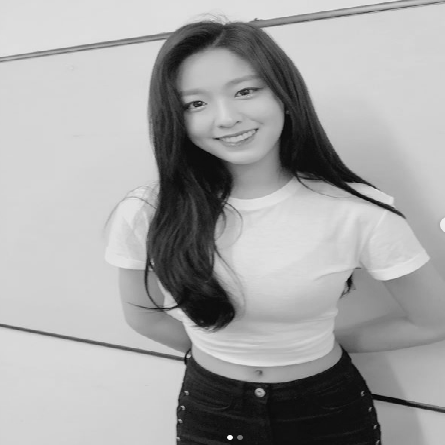

In [34]:
black_image

In [49]:
rgb_color_image_2 = color_image_2.convert('RGB')

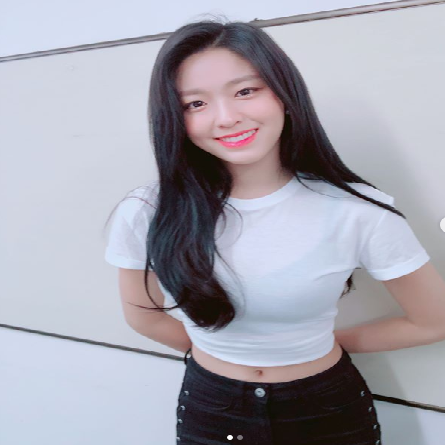

In [50]:
rgb_color_image_2

# Pic to Matrix : numpy.asarry
* RGB to matrix   
* black to matrix  

* RGB to matrix

In [52]:
rgb_matrix = np.asarray(rgb_color_image_2)

In [46]:
black_matrix = np.asarray(black_image)

In [47]:
black_matrix.shape

(445, 445)

In [48]:
black_matrix

array([[218, 218, 218, ..., 166, 161, 155],
       [218, 218, 218, ..., 142, 132, 123],
       [218, 218, 218, ..., 173, 167, 164],
       ...,
       [209, 210, 210, ..., 193, 194, 194],
       [209, 210, 210, ..., 193, 193, 193],
       [209, 210, 210, ..., 193, 192, 192]], dtype=uint8)

# Keras Machine Learing for Image


In [2]:
from urllib.request import urlretrieve

In [3]:
urlretrieve('http://doc.mindscale.kr/km/unstructured/dog-vs-cat.zip',
            'dog-vs-cat.zip')

('dog-vs-cat.zip', <http.client.HTTPMessage at 0x1818e2e3dd8>)

In [4]:
from zipfile import ZipFile

In [5]:
with ZipFile('dog-vs-cat.zip') as z:
    z.extractall()

* image import by using Keras

In [6]:
from keras.preprocessing.image import load_img

Using TensorFlow backend.


In [7]:
img = load_img('dog-vs-cat/train/cat/cat.1.jpg')

In [8]:
img.size

(300, 280)

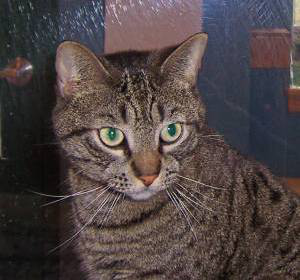

In [10]:
img

In [11]:
from keras.preprocessing.image import ImageDataGenerator

* data generation due to the small number of sample

In [12]:
img_gen = ImageDataGenerator(
        rescale=1./255,         # 픽셀 값을 0~1 범위로 변환
        rotation_range=40,      # 40도까지 회전
        width_shift_range=0.2,  # 20%까지 좌우 이동
        height_shift_range=0.2, # 20%까지 상하 이동
        shear_range=0.2,        # 20%까지 기울임
        zoom_range=0.2,         # 20%까지 확대
        horizontal_flip=True,   # 좌우 뒤집기
    )

In [13]:
train = img_gen.flow_from_directory(
    'dog-vs-cat/train',     # 이미지 디렉토리
    target_size=(100, 100), # 변환할 크기는 가로 100, 세로 100
    color_mode='rgb',       # 컬러는 rgb, 흑백은 grayscale. 생략하면 컬러로 처리한다
    class_mode='binary')    # 고양이 vs. 개로 binary 분류

Found 2000 images belonging to 2 classes.


* import validation data, but don't need to augmentation of image

In [14]:
valid = ImageDataGenerator(rescale=1.0/255).flow_from_directory(
    'dog-vs-cat/validation',
    target_size=(100, 100),
    class_mode='binary',
    shuffle=False)

Found 800 images belonging to 2 classes.


# Making Model
* logistic regression

In [15]:
from keras import Sequential
from keras.layers import Dense, Flatten

* build a model with Sequential

In [16]:
model = Sequential()

* making a layer = input data as row =100 x col =100 x color = 3, matrix of 100 x 100 x 3

In [17]:
model.add(Flatten(input_shape=(100,100,3)))

* Making a dense layer for prediction, in here sigmoid function is used as an activation function

In [18]:
model.add(Dense(1, activation='sigmoid'))

In [19]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_1 (Flatten)          (None, 30000)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 30001     
Total params: 30,001
Trainable params: 30,001
Non-trainable params: 0
_________________________________________________________________


# Model Specification
- loss function : mse, binary_crossentropy, categorical_crossentropy, for here accuracy is also used 
- optimization : RMSprop, Adam

In [20]:
from keras.optimizers import Adam

In [21]:
model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.001)) # lr = learning rate

# Fitting (= Learning) with train, validation data

In [22]:
model.fit_generator(train, validation_data=valid, epochs=5)

Epoch 1/5
63/63 [==============================] - 19s 309ms/step - loss: 1.1619 - acc: 0.4975 - val_loss: 0.7643 - val_acc: 0.5288
Epoch 2/5
63/63 [==============================] - 17s 269ms/step - loss: 0.8831 - acc: 0.5302 - val_loss: 1.0515 - val_acc: 0.4988
Epoch 3/5
63/63 [==============================] - 18s 291ms/step - loss: 0.8537 - acc: 0.5293 - val_loss: 0.8143 - val_acc: 0.5300
Epoch 4/5
63/63 [==============================] - 16s 262ms/step - loss: 0.9085 - acc: 0.5397 - val_loss: 2.5856 - val_acc: 0.5012
Epoch 5/5
63/63 [==============================] - 15s 245ms/step - loss: 0.9172 - acc: 0.5367 - val_loss: 0.8352 - val_acc: 0.5100


In [31]:
img = load_img('dog-vs-cat/validation/cat/cat.1000.jpg', target_size=(100, 100)) # call image as 100 x 00 size

In [32]:
img.size

(100, 100)

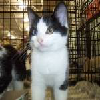

In [33]:
img

In [34]:
type(img)

PIL.Image.Image

* change img from image file to numpy arrary

In [35]:
img_array = np.array(img) / 255 # divided by 255 for normalization

In [36]:
img_array.shape

(100, 100, 3)

In [37]:
type(img_array)

numpy.ndarray

* prediction with fitted logistic regression with this image (=img, numpy arrared)

In [38]:
model.predict(np.array([img_array])) # probability of being classified as dog 

array([[0.56797516]], dtype=float32)

* this pricture may imply cat (= the probablity of dog = 0.118 so it is more likely to be a cat

# Analyzing why it is predicted as cat with LIME
* image explainer after prediction : kinda posterior analysis

In [39]:
from lime.lime_image import LimeImageExplainer

In [40]:
explainer = LimeImageExplainer()

* finding the reason of classifier by using 30 sample which remove the part of its part

In [41]:
explanation = explainer.explain_instance(img_array, model.predict, num_samples=100)

* making a mask to see why it recognizes as a cat

In [42]:
temp, mask = explanation.get_image_and_mask(label=0, hide_rest=True) # label =0 means cat

* visualize the mask

In [43]:
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt

In [44]:
%matplotlib inline

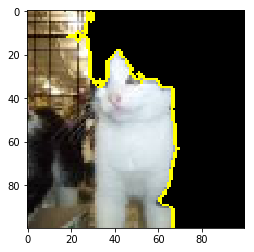

In [45]:
plt.imshow(mark_boundaries(temp, mask))

# Tensorboard
* save fitted record to "log model"
* Monitoring tensorboard

In [46]:
from keras.callbacks import TensorBoard

* save fitted record to "log model"

In [47]:
LOG_DIR = 'log_model'

* Monitoring tensorboard

In [49]:
model.fit_generator(
    train, validation_data=valid, epochs=5,
    callbacks=[
        TensorBoard(log_dir=LOG_DIR)
    ])

Epoch 1/5
63/63 [==============================] - 16s 250ms/step - loss: 0.8263 - acc: 0.5650 - val_loss: 0.7913 - val_acc: 0.5225
Epoch 2/5
63/63 [==============================] - 15s 236ms/step - loss: 0.8493 - acc: 0.5471 - val_loss: 0.7491 - val_acc: 0.5437
Epoch 3/5
63/63 [==============================] - 13s 209ms/step - loss: 0.8320 - acc: 0.5357 - val_loss: 0.8378 - val_acc: 0.5200
Epoch 4/5
63/63 [==============================] - 16s 259ms/step - loss: 0.8632 - acc: 0.5149 - val_loss: 0.7774 - val_acc: 0.5375
Epoch 5/5
63/63 [==============================] - 15s 239ms/step - loss: 0.8475 - acc: 0.5298 - val_loss: 1.0044 - val_acc: 0.5138


* not here but, jypyter cmd window: (type) tensorboard --host=127.0.0.1 --logdir=log_model  
* type in web ( http://127.0.0.1:6006 or http://localhost:6006) to access tensorboard

# Early Stopping for handling overfitting

In [30]:
from keras.callbacks import EarlyStopping

* 1. monitoring validation error (val_loss)
* 2. stopping when validation error is not decreasing until 2 times (= patience=2)
* 3. fitting the model with above 1,2 condition with traning and validation set

In [50]:
model.fit_generator(
    train, validation_data=valid, epochs=30,
    callbacks=[
        TensorBoard(log_dir='log_model'),
        EarlyStopping(monitor = "val_loss", patience=2) # Early stopping condition
    ])

Epoch 1/30
63/63 [==============================] - 17s 275ms/step - loss: 1.2271 - acc: 0.5060 - val_loss: 1.1241 - val_acc: 0.5125
Epoch 2/30
63/63 [==============================] - 13s 212ms/step - loss: 0.9655 - acc: 0.5402 - val_loss: 0.8053 - val_acc: 0.5300
Epoch 3/30
63/63 [==============================] - 13s 214ms/step - loss: 0.8523 - acc: 0.5273 - val_loss: 0.7839 - val_acc: 0.5300
Epoch 4/30
63/63 [==============================] - 14s 224ms/step - loss: 0.8327 - acc: 0.5575 - val_loss: 0.7887 - val_acc: 0.5450
Epoch 5/30
63/63 [==============================] - 20s 317ms/step - loss: 0.8142 - acc: 0.5591 - val_loss: 0.7446 - val_acc: 0.5475
Epoch 6/30
63/63 [==============================] - 15s 238ms/step - loss: 0.8221 - acc: 0.5447 - val_loss: 0.8972 - val_acc: 0.5487
Epoch 7/30
63/63 [==============================] - 14s 229ms/step - loss: 0.7899 - acc: 0.5511 - val_loss: 0.7134 - val_acc: 0.5687
Epoch 8/30
63/63 [==============================] - 14s 227ms/step - 

# save keras model, load keras model, prediction
* .save method to save keras model
* load_model

In [56]:
model.save('dog_cat_logit_model.krs')

In [57]:
from keras.models import load_model

In [58]:
saved_dog_cat_logit_model = load_model('dog_cat_logit_model.krs')

* derive a predicted probability of label is a dog in the validation data set
* with saved model.predict_generator = predict probablity to say dog

In [61]:
predicted_prob = saved_dog_cat_logit_model.predict_generator(valid)

* making binary label by saying a predicted probability is more than 50% =1 otherwise 0

In [62]:
binary_label = np.where(predicted_prob > .5, 1, 0) # prob >0.5 =1 

In [63]:
binary_label[:5]

array([[0],
       [1],
       [0],
       [1],
       [1]])

# Check Point
* rather than early stopping, opposite approach, if the performance is increasing or loss is decreasing, then save the model

In [65]:
from keras.callbacks import ModelCheckpoint

In [66]:
model.fit_generator(
    train, validation_data=valid, epochs=10, # just 10 iteration to save time
    callbacks=[
        ModelCheckpoint('model-{epoch:02d}.hdf5', save_best_only=True), # model check point
        TensorBoard(log_dir='log_model')
    ])

Epoch 1/10
63/63 [==============================] - 15s 234ms/step - loss: 0.8031 - acc: 0.5501 - val_loss: 0.8231 - val_acc: 0.5575
Epoch 2/10
63/63 [==============================] - 13s 212ms/step - loss: 0.9241 - acc: 0.5303 - val_loss: 1.1784 - val_acc: 0.5100
Epoch 3/10
63/63 [==============================] - 13s 214ms/step - loss: 0.8146 - acc: 0.5377 - val_loss: 0.7122 - val_acc: 0.5837
Epoch 4/10
63/63 [==============================] - 14s 229ms/step - loss: 0.9367 - acc: 0.5387 - val_loss: 0.9632 - val_acc: 0.5275
Epoch 5/10
63/63 [==============================] - 13s 214ms/step - loss: 0.7702 - acc: 0.5422 - val_loss: 0.7011 - val_acc: 0.5825
Epoch 6/10
63/63 [==============================] - 14s 224ms/step - loss: 0.7529 - acc: 0.5491 - val_loss: 0.8294 - val_acc: 0.5450
Epoch 7/10
63/63 [==============================] - 14s 230ms/step - loss: 0.9664 - acc: 0.5283 - val_loss: 1.3565 - val_acc: 0.5012
Epoch 8/10
63/63 [==============================] - 16s 248ms/step - 

# See a saved model list

In [67]:
import glob

In [68]:
model_files = glob.glob('model-*.hdf5')

In [69]:
last_model = sorted(model_files)[-1]

In [70]:
last_model

'model-05.hdf5'

# in Colab
* can download the model from colab
* from google.colab import files
* files.download(last_model)